In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [6]:
# Generate 4 clusters of random data.
from sklearn.datasets.samples_generator import make_blobs

data, _ = make_blobs(n_samples=300, centers=4,
                     cluster_std=0.60, random_state=0)

In [3]:
# Dependencies
import numpy as np
import pandas as pd

In [15]:
data = pd.read_csv("exoplanet_data.csv")
# Drop the null columns where all values are null
data = data.dropna(axis='columns', how='all')
# Drop the null rows
data = data.dropna()
data.head()

,koi_disposition,koi_fpflag_nt,koi_fpflag_ss,koi_fpflag_co,koi_fpflag_ec,koi_period,koi_period_err1,koi_period_err2,koi_time0bk,koi_time0bk_err1,...,koi_steff_err2,koi_slogg,koi_slogg_err1,koi_slogg_err2,koi_srad,koi_srad_err1,koi_srad_err2,ra,dec,koi_kepmag
0,CONFIRMED,0,0,0,0,54.418383,2.479000e-04,-2.479000e-04,162.513840,0.003520,...,-81,4.467,0.064,-0.096,0.927,0.105,-0.061,291.93423,48.141651,15.347
1,FALSE POSITIVE,0,1,0,0,19.899140,1.490000e-05,-1.490000e-05,175.850252,0.000581,...,-176,4.544,0.044,-0.176,0.868,0.233,-0.078,297.00482,48.134129,15.436
2,FALSE POSITIVE,0,1,0,0,1.736952,2.630000e-07,-2.630000e-07,170.307565,0.000115,...,-174,4.564,0.053,-0.168,0.791,0.201,-0.067,285.53461,48.285210,15.597
3,CONFIRMED,0,0,0,0,2.525592,3.760000e-06,-3.760000e-06,171.595550,0.001130,...,-211,4.438,0.070,-0.210,1.046,0.334,-0.133,288.75488,48.226200,15.509
4,CONFIRMED,0,0,0,0,4.134435,1.050000e-05,-1.050000e-05,172.979370,0.001900,...,-232,4.486,0.054,-0.229,0.972,0.315,-0.105,296.28613,48.224670,15.714


In [14]:
#data[:,0]

In [20]:
from sklearn.preprocessing import LabelEncoder

y = data["koi_disposition"]
# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(y)
encoded_y = label_encoder.transform(y)
encoded_y

array([1, 2, 2, ..., 0, 2, 2])

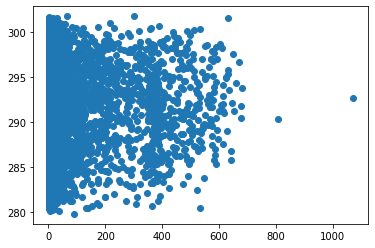

In [16]:
# Plot the data
plt.scatter(data["koi_period"], data["ra"])

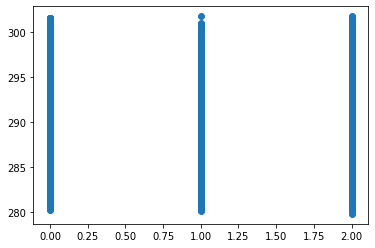

In [21]:
# Plot the data
plt.scatter(encoded_y, data["ra"])

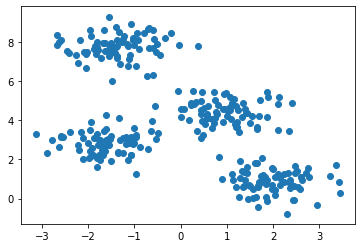

In [7]:
# Plot the data
plt.scatter(data[:, 0], data[:, 1])

In [8]:
# Use n_clusters=4 as the k value
# We can see from the plot above that there are 4 clusters
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)

In [9]:
# Fit the model to the data
kmeans.fit(data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [10]:
# Predict the clusters
predicted_clusters = kmeans.predict(data)

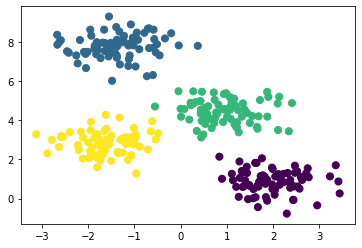

In [13]:
# Plot the predicted clusters to see if the model predicted the correct clusters
# This is visual validation that the model was trained correctly.
plt.scatter(data[:, 0], data[:, 1], c=predicted_clusters, s=50, cmap='viridis')